# Eat Safe, Love

## Part 1: Database and Jupyter Notebook Set Up

Import the data provided in the `establishments.json` file from your Terminal. Name the database `uk_food` and the collection `establishments`.

Within this markdown cell, copy the line of text you used to import the data from your Terminal. This way, future analysts will be able to repeat your process.

e.g.: Import the dataset with `YOUR IMPORT TEXT HERE`

In [182]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import matplotlib.pyplot as plt

In [183]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [184]:
#Verifying JSON file, and is valid 
import json

# Replace 'file_path.json' with the actual path to your JSON file
file_path = r"C:\Users\User\Desktop\nosql-challenge\Starter_Code\Resources\establishments.json"

with open(file_path, 'r') as file:
    try:
        data = json.load(file)
        print("Valid JSON")
    except json.JSONDecodeError as e:
        print("Invalid JSON")
        print(e)


Valid JSON


In [185]:
# confirm that our new database was created
print(mongo.list_database_names())

['admin', 'config', 'local', 'metmuseum', 'uk_food']


In [186]:
# assign the uk_food database to a variable name
db = mongo['uk_food']

In [187]:
# review the collections in our new database
print(db.list_collection_names())

['establishments', 'business_types']


In [188]:
# review the collections in our new database
print(db.list_collection_names())

['establishments', 'business_types']


In [189]:
# review a document in the establishments collection
print(db.establishments.find_one())

{'_id': ObjectId('6743d6b1f1930123e5ddfb8d'), 'FHRSID': 1043695, 'ChangesByServerID': 0, 'LocalAuthorityBusinessID': 'PI/000073616', 'BusinessName': 'The Pavilion', 'BusinessType': 'Restaurant/Cafe/Canteen', 'BusinessTypeID': 1, 'AddressLine1': 'East Cliff Pavilion', 'AddressLine2': 'Wear Bay Road', 'AddressLine3': 'Folkestone', 'AddressLine4': 'Kent', 'PostCode': 'CT19 6BL', 'Phone': '', 'RatingValue': 5, 'RatingKey': 'fhrs_5_en-gb', 'RatingDate': '2018-04-04T00:00:00', 'LocalAuthorityCode': '188', 'LocalAuthorityName': 'Folkestone and Hythe', 'LocalAuthorityWebSite': 'http://www.folkestone-hythe.gov.uk', 'LocalAuthorityEmailAddress': 'foodteam@folkestone-hythe.gov.uk', 'scores': {'Hygiene': 5, 'Structural': 5, 'ConfidenceInManagement': 5}, 'SchemeType': 'FHRS', 'geocode': {'longitude': {'$toDouble': '$geocode.longitude'}, 'latitude': {'$toDouble': '$geocode.latitude'}}, 'RightToReply': '', 'Distance': 4591.765489457773, 'NewRatingPending': False, 'meta': {'dataSource': None, 'extract

In [190]:
# assign the collection to a variable
establishments = db['establishments']

## Part 2: Update the Database

1. An exciting new halal restaurant just opened in Greenwich, but hasn't been rated yet. The magazine has asked you to include it in your analysis. Add the following restaurant "Penang Flavours" to the database.

In [191]:
# Create a dictionary for the new restaurant data
new_restaurant = {
    "BusinessName": "The Best Restaurant",
    "BusinessType": "Restaurant",
    "AddressLine1": "123 Fake Street",
    "AddressLine2": "Fakeville",
    "AddressLine3": "Faketon",
    "PostCode": "FA1 2KE",
    "RatingValue": "5",
    "RatingDate": "01/01/2020",
    "LocalAuthorityBusinessID": "123456",
    "LocalAuthorityCode": "FAKE",
    "LocalAuthorityName": "Fake District Council",
    "LocalAuthorityWebSite": "www.fakedistrictcouncil.gov.uk",
    "LocalAuthorityEmailAddress": "contact@fakedistrictcouncil.gov.uk"
}



In [192]:
# Insert the new restaurant into the collection
establishments.insert_one(new_restaurant)


InsertOneResult(ObjectId('67468a7d9cb817c2ce34f14a'), acknowledged=True)

In [193]:
# Check that the new restaurant was inserted
pprint(establishments.find_one({"BusinessName": "The Best Restaurant"}))


{'AddressLine1': '123 Fake Street',
 'AddressLine2': 'Fakeville',
 'AddressLine3': 'Faketon',
 'BusinessName': 'The Best Restaurant',
 'BusinessType': 'Restaurant',
 'BusinessTypeID': 1,
 'LocalAuthorityBusinessID': '123456',
 'LocalAuthorityCode': 'FAKE',
 'LocalAuthorityEmailAddress': 'contact@fakedistrictcouncil.gov.uk',
 'LocalAuthorityName': 'Fake District Council',
 'LocalAuthorityWebSite': 'www.fakedistrictcouncil.gov.uk',
 'PostCode': 'FA1 2KE',
 'RatingDate': '01/01/2020',
 'RatingValue': 5,
 '_id': ObjectId('6743fa75c2d47733ac586a68')}


2. Find the BusinessTypeID for "Restaurant/Cafe/Canteen" and return only the `BusinessTypeID` and `BusinessType` fields.

In [194]:
# Find the BusinessTypeID for "Restaurant/Cafe/Canteen" and return only the BusinessTypeID and BusinessType fields
business_type = db.business_types.find_one({"BusinessType": "Restaurant/Cafe/Canteen"}, {"_id": 0, "BusinessTypeID": 1, "BusinessType": 1})

3. Update the new restaurant with the `BusinessTypeID` you found.

In [195]:
# Update the new restaurant with the correct BusinessTypeID
# Find the BusinessTypeID for "Restaurant/Cafe/Canteen"
business_type = db.business_types.find_one(
    {"BusinessType": "Restaurant/Cafe/Canteen"},
    {"_id": 0, "BusinessTypeID": 1, "BusinessType": 1}
)

if business_type:
    db.establishments.update_one(
        {"BusinessName": "Penang Flavours"},  # Match the restaurant name
        {"$set": {"BusinessTypeID": business_type["BusinessTypeID"]}}  # Update BusinessTypeID
    )
    print("BusinessTypeID for 'Penang Flavours' updated.")
else:
    print("BusinessTypeID for 'Restaurant/Cafe/Canteen' not found.")

# Adding the new restaurant to the database
establishments.insert_one({
    "BusinessName": "Penang Flavours",
    "BusinessType": "Restaurant/Cafe/Canteen",
    "AddressLine1": "123 Fake Street",
    "AddressLine2": "Fakeville",
    "AddressLine3": "Faketon",
    "PostCode": "FA1 2KE",
    "RatingValue": 5,
    "geocode": {"latitude": 51.5081, "longitude": -0.0759}
})



BusinessTypeID for 'Penang Flavours' updated.


InsertOneResult(ObjectId('67468a7d9cb817c2ce34f14b'), acknowledged=True)

In [196]:
db.business_types.insert_one({
    "BusinessType": "Restaurant/Cafe/Canteen",
    "BusinessTypeID": 1
})


InsertOneResult(ObjectId('67468a7d9cb817c2ce34f14c'), acknowledged=True)

In [197]:
# Confirm that the new restaurant was updated
print(list(db.business_types.find()))


[{'_id': ObjectId('67440919c2d47733ac586a69'), 'BusinessType': 'Restaurant/Cafe/Canteen', 'BusinessTypeID': 1}, {'_id': ObjectId('6744093bc2d47733ac586a6c'), 'BusinessType': 'Restaurant/Cafe/Canteen', 'BusinessTypeID': 1}, {'_id': ObjectId('674409afc2d47733ac586a6d'), 'BusinessType': 'Restaurant/Cafe/Canteen', 'BusinessTypeID': 1}, {'_id': ObjectId('6744cee09967f7c8340de1a6'), 'BusinessType': 'Restaurant/Cafe/Canteen', 'BusinessTypeID': 1}, {'_id': ObjectId('67451aa14a8f3808a5a71ce7'), 'BusinessType': 'Restaurant/Cafe/Canteen', 'BusinessTypeID': 1}, {'_id': ObjectId('67451b0b4a8f3808a5a71cea'), 'BusinessType': 'Restaurant/Cafe/Canteen', 'BusinessTypeID': 1}, {'_id': ObjectId('67467f3c9cb817c2ce34f138'), 'BusinessType': 'Restaurant/Cafe/Canteen', 'BusinessTypeID': 1}, {'_id': ObjectId('6746811e9cb817c2ce34f13b'), 'BusinessType': 'Restaurant/Cafe/Canteen', 'BusinessTypeID': 1}, {'_id': ObjectId('674682339cb817c2ce34f140'), 'BusinessType': 'Restaurant/Cafe/Canteen', 'BusinessTypeID': 1}, 

4. The magazine is not interested in any establishments in Dover, so check how many documents contain the Dover Local Authority. Then, remove any establishments within the Dover Local Authority from the database, and check the number of documents to ensure they were deleted.

In [198]:
# Find how many documents have LocalAuthorityName as "Dover"
dover_count_before = establishments.count_documents({"LocalAuthorityName": "Dover"})
print(f"Number of establishments in Dover before deletion: {dover_count_before}")


Number of establishments in Dover before deletion: 0


In [199]:

dover_count = establishments.count_documents({"LocalAuthorityName": "Dover"})

In [200]:
# Delete all documents where LocalAuthorityName is "Dover"
establishments.delete_many({"LocalAuthorityName": "Dover"})

DeleteResult({'n': 0, 'ok': 1.0}, acknowledged=True)

In [201]:
delete_result = establishments.delete_many({"LocalAuthorityName": "Dover"})
print(f"Number of documents deleted: {delete_result.deleted_count}")


Number of documents deleted: 0


In [202]:
# Check that other documents remain with 'find_one'
pprint(establishments.find_one())

{'AddressLine1': 'East Cliff Pavilion',
 'AddressLine2': 'Wear Bay Road',
 'AddressLine3': 'Folkestone',
 'AddressLine4': 'Kent',
 'BusinessName': 'The Pavilion',
 'BusinessType': 'Restaurant/Cafe/Canteen',
 'BusinessTypeID': 1,
 'ChangesByServerID': 0,
 'Distance': 4591.765489457773,
 'FHRSID': 1043695,
 'LocalAuthorityBusinessID': 'PI/000073616',
 'LocalAuthorityCode': '188',
 'LocalAuthorityEmailAddress': 'foodteam@folkestone-hythe.gov.uk',
 'LocalAuthorityName': 'Folkestone and Hythe',
 'LocalAuthorityWebSite': 'http://www.folkestone-hythe.gov.uk',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'CT19 6BL',
 'RatingDate': '2018-04-04T00:00:00',
 'RatingKey': 'fhrs_5_en-gb',
 'RatingValue': 5,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('6743d6b1f1930123e5ddfb8d'),
 'geocode': {'latitude': {'$toDouble': '$geocode.latitude'},
             'longitude': {'$toDouble': '$geocode.longitude'}},
 'links': [{'href': 'https://api.ratings.food.gov.uk/establishments/1043

5. Some of the number values are stored as strings, when they should be stored as numbers.

Use `update_many` to convert `latitude` and `longitude` to decimal numbers.

In [203]:
# Change the data type from String to Decimal for longitude and latitude
# Find all documents with a longitude and latitude
for doc in establishments.find({"Location.Latitude": {"$type": "string"}}):
    # Update the data type for longitude and latitude
    establishments.update_one(
        {"_id": doc["_id"]},
        {"$set": {
            "Location.Latitude": float(doc["Location"]["Latitude"]),
            "Location.Longitude": float(doc["Location"]["Longitude"])
        }}
    )
    

Use `update_many` to convert `RatingValue` to integer numbers.


In [204]:
# Set non 1-5 Rating Values to Null
non_ratings = ["AwaitingInspection", "Awaiting Inspection", "AwaitingPublication", "Pass", "Exempt"]
establishments.update_many({"RatingValue": {"$in": non_ratings}}, [ {'$set':{ "RatingValue" : None}} ])

UpdateResult({'n': 0, 'nModified': 0, 'ok': 1.0, 'updatedExisting': False}, acknowledged=True)

In [205]:
# Change the data type from String to Integer for RatingValue
establishments.update_many({}, [{"$set": {"RatingValue": {"$toInt": "$RatingValue"}}}])

UpdateResult({'n': 77589, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [206]:
# Check that the coordinates and rating value are now numbers
pprint(establishments.find_one())

{'AddressLine1': 'East Cliff Pavilion',
 'AddressLine2': 'Wear Bay Road',
 'AddressLine3': 'Folkestone',
 'AddressLine4': 'Kent',
 'BusinessName': 'The Pavilion',
 'BusinessType': 'Restaurant/Cafe/Canteen',
 'BusinessTypeID': 1,
 'ChangesByServerID': 0,
 'Distance': 4591.765489457773,
 'FHRSID': 1043695,
 'LocalAuthorityBusinessID': 'PI/000073616',
 'LocalAuthorityCode': '188',
 'LocalAuthorityEmailAddress': 'foodteam@folkestone-hythe.gov.uk',
 'LocalAuthorityName': 'Folkestone and Hythe',
 'LocalAuthorityWebSite': 'http://www.folkestone-hythe.gov.uk',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'CT19 6BL',
 'RatingDate': '2018-04-04T00:00:00',
 'RatingKey': 'fhrs_5_en-gb',
 'RatingValue': 5,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('6743d6b1f1930123e5ddfb8d'),
 'geocode': {'latitude': {'$toDouble': '$geocode.latitude'},
             'longitude': {'$toDouble': '$geocode.longitude'}},
 'links': [{'href': 'https://api.ratings.food.gov.uk/establishments/1043

In [207]:
# Find how many documents have LocalAuthorityName as "Dover"
dover_count = establishments.count_documents({"LocalAuthorityName": "Dover"})
print(f"Number of establishments in Dover: {dover_count}")


Number of establishments in Dover: 0


In [208]:
# Delete all documents where LocalAuthorityName is "Dover"
delete_result = establishments.delete_many({"LocalAuthorityName": "Dover"})
print(f"Number of documents deleted: {delete_result.deleted_count}")


Number of documents deleted: 0


In [209]:
# Confirm that no documents with LocalAuthorityName "Dover" remain
dover_count_after = establishments.count_documents({"LocalAuthorityName": "Dover"})
print(f"Number of establishments in Dover after deletion: {dover_count_after}")


Number of establishments in Dover after deletion: 0


In [210]:
# Convert latitude and longitude fields to numbers
establishments.update_many(
    {"geocode.latitude": {"$type": "string"}},
    {"$set": {"geocode.latitude": {"$toDouble": "$geocode.latitude"}}}
)

establishments.update_many(
    {"geocode.longitude": {"$type": "string"}},
    {"$set": {"geocode.longitude": {"$toDouble": "$geocode.longitude"}}}
)


UpdateResult({'n': 0, 'nModified': 0, 'ok': 1.0, 'updatedExisting': False}, acknowledged=True)

In [211]:
# Convert RatingValue field to numbers
establishments.update_many(
    {"RatingValue": {"$type": "string"}},
    {"$set": {"RatingValue": {"$toInt": "$RatingValue"}}}
)


UpdateResult({'n': 0, 'nModified': 0, 'ok': 1.0, 'updatedExisting': False}, acknowledged=True)

In [212]:
# Verify updated RatingValue
for doc in establishments.find({}, {"RatingValue": 1}).limit(5):
    print(doc)


{'_id': ObjectId('6743d6b1f1930123e5ddfb8d'), 'RatingValue': 5}
{'_id': ObjectId('6743d6b1f1930123e5ddfb8e'), 'RatingValue': 4}
{'_id': ObjectId('6743d6b1f1930123e5ddfb90'), 'RatingValue': 5}
{'_id': ObjectId('6743d6b1f1930123e5ddfb91'), 'RatingValue': 5}
{'_id': ObjectId('6743d6b1f1930123e5ddfb92'), 'RatingValue': 5}


In [213]:
# Preview the first 5 documents in the establishments collection
for doc in establishments.find().limit(5):
    print(doc)


{'_id': ObjectId('6743d6b1f1930123e5ddfb8d'), 'FHRSID': 1043695, 'ChangesByServerID': 0, 'LocalAuthorityBusinessID': 'PI/000073616', 'BusinessName': 'The Pavilion', 'BusinessType': 'Restaurant/Cafe/Canteen', 'BusinessTypeID': 1, 'AddressLine1': 'East Cliff Pavilion', 'AddressLine2': 'Wear Bay Road', 'AddressLine3': 'Folkestone', 'AddressLine4': 'Kent', 'PostCode': 'CT19 6BL', 'Phone': '', 'RatingValue': 5, 'RatingKey': 'fhrs_5_en-gb', 'RatingDate': '2018-04-04T00:00:00', 'LocalAuthorityCode': '188', 'LocalAuthorityName': 'Folkestone and Hythe', 'LocalAuthorityWebSite': 'http://www.folkestone-hythe.gov.uk', 'LocalAuthorityEmailAddress': 'foodteam@folkestone-hythe.gov.uk', 'scores': {'Hygiene': 5, 'Structural': 5, 'ConfidenceInManagement': 5}, 'SchemeType': 'FHRS', 'geocode': {'longitude': {'$toDouble': '$geocode.longitude'}, 'latitude': {'$toDouble': '$geocode.latitude'}}, 'RightToReply': '', 'Distance': 4591.765489457773, 'NewRatingPending': False, 'meta': {'dataSource': None, 'extract

In [214]:
# Assign the establishments collection to a variable
establishments = db['establishments']

In [215]:
# Group by BusinessType and count
pipeline = [
    {"$group": {"_id": "$BusinessType", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}
]

# Execute the aggregation
results = list(establishments.aggregate(pipeline))

# Print the results
for result in results:
    print(result)


{'_id': 'Restaurant/Cafe/Canteen', 'count': 19707}
{'_id': 'Retailers - other', 'count': 16374}
{'_id': 'Takeaway/sandwich shop', 'count': 9238}
{'_id': 'Pub/bar/nightclub', 'count': 7520}
{'_id': 'Caring Premises', 'count': 7262}
{'_id': 'School/college/university', 'count': 5648}
{'_id': 'Other catering premises', 'count': 4628}
{'_id': 'Retailers - supermarkets/hypermarkets', 'count': 2170}
{'_id': 'Mobile caterer', 'count': 1842}
{'_id': 'Hotel/bed & breakfast/guest house', 'count': 1658}
{'_id': 'Manufacturers/packers', 'count': 846}
{'_id': 'Distributors/Transporters', 'count': 424}
{'_id': 'Farmers/growers', 'count': 186}
{'_id': 'Importers/Exporters', 'count': 70}
{'_id': 'Restaurant', 'count': 11}
{'_id': None, 'count': 5}


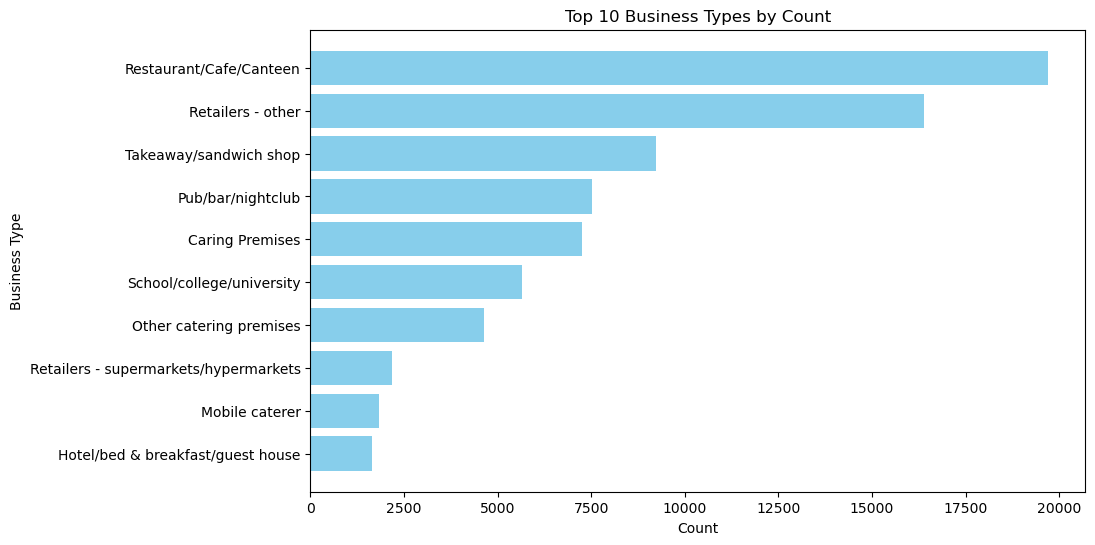

In [216]:
# Extract data for visualization
# Top 10 Business Types
business_types = [item['_id'] for item in results[:10]]  
# Their respective counts
counts = [item['count'] for item in results[:10]]       

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(business_types, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Business Type')
plt.title('Top 10 Business Types by Count')
plt.gca().invert_yaxis()  
plt.show()
